In [1]:
from collections import Counter
from sklearn.datasets import make_classification

In [16]:
x, y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.99], random_state=10 )

In [17]:
x

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [18]:
Counter(y)

Counter({np.int64(0): 9846, np.int64(1): 154})

In [19]:
import seaborn as sns

In [20]:
import pandas as pd

<Axes: xlabel='0', ylabel='1'>

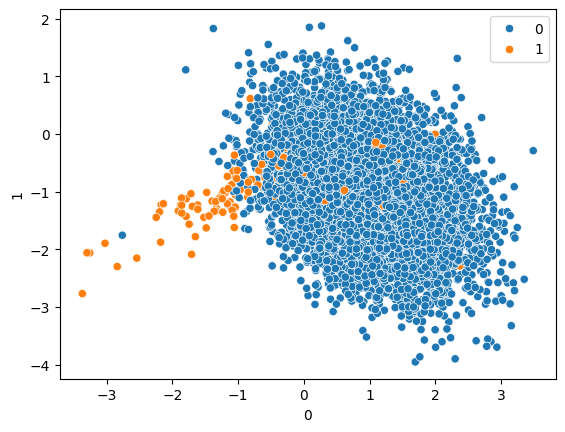

In [21]:
sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1], hue = y)

In [22]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w, 1:y} for w in[1, 10, 50, 100] for y in [1, 10, 50, 100]]

In [24]:
params = dict(penalty = penalty, C = c_values, solver = solver, class_weight = class_weight)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring = 'accuracy', cv = cv)

In [27]:
grid.fit(xtrain, ytrain)

d:\ml codes\.venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ml codes\.venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ml codes\.venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ml codes\.venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ml codes\.venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\ml codes\.venv\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [28]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [29]:
ypred = grid.predict(xtest)

In [30]:
ypred

array([0, 0, 0, ..., 0, 0, 0])